In [1]:
import os
import pathlib
import numpy as np
from numpy import random
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats

from Data import DataSimulator
from Performance import DDR_Problem_Evaluation
ddr_eva = DDR_Problem_Evaluation()
from OLS import OLS_Related_Estimation
from DDR_Estimation import DDR_Method
from Figure_Regret_H2H import Regret_H2H

In [2]:
data_generation_process = "DDR_Data_Generation"
current_directory = os.getcwd()
print("current_directory:", current_directory)
project_directory = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(current_directory))))
print("project_directory:", project_directory)
DataPath = project_directory + "/Data_JOC_R1/DDR/Benchmark/"
print("DataPath:", DataPath)
pathlib.Path(DataPath).mkdir(parents=True, exist_ok=True)

current_directory: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Code_MacBook/Decision_Driven_Regularization/JOC_R1/DDR
project_directory: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/DDR/Benchmark/


### Parameters

In [3]:
params = {}
params["seed"] = 3
params["iters"] = 100
params["p"] = 4
params["d"] = 10
params["samples_test"] = 10000
params["samples_train"] = 100
params["lower"] = 0
params["upper"] = 1
params["alpha"] = 1
params["n_epsilon"] = 1
params["mis"] = 1
params["thres"] = 10000
params["ver"] = 1
params["x_dister"] = 'uniform'
params["e_dister"] = 'normal'
params["xl"] = -2
params["xu"] = 2
params["xm"] = 2
params["xv"] = 0.25
params["bp"] = 7
params["mu"] = 0.25
params["lamb"] = 0.25
with open(DataPath+'params.pkl', "wb") as tf:
    pickle.dump(params,tf)

### Data Generation

In [4]:
random.seed(params["seed"])
Data = {}
data_generation_process = "DDR_Data_Generation"
data_simu = DataSimulator()
for i in range(params["iters"]):
    if i % 10 == 0:
        print("============== iteration = ",i,"==============")
    file_path = DataPath + "iter="+str(i) +"/"
    pathlib.Path(file_path).mkdir(parents=True, exist_ok=True)
    W_star = data_simu.generate_truth(params["lower"], params["upper"], params["p"], params["d"], data_generation_process) 
    Data[i] = data_simu.generate_samples(file_path,params["p"], params["d"], params["samples_test"], params["samples_train"], 
                                         params["alpha"], W_star, params["n_epsilon"], params["mis"], params["thres"], data_generation_process, 
                                         params["x_dister"], params["e_dister"], params["xl"], params["xu"], params["xm"], params["xv"], params["bp"]) 
with open(DataPath+'Data.pkl', "wb") as tf:
    pickle.dump(Data,tf)

============== iteration =  0 ==============
============== iteration =  10 ==============
============== iteration =  20 ==============
============== iteration =  30 ==============
============== iteration =  40 ==============
============== iteration =  50 ==============
============== iteration =  60 ==============
============== iteration =  70 ==============
============== iteration =  80 ==============
============== iteration =  90 ==============


### Oracle

In [5]:
cost_Oracle_with_noise_all = {}; cost_Oracle_wo_noise_all = {}
for i in range(params["iters"]):
    if i % 10 == 0:
        print("============== iteration = ",i,"==============")
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    cost_Oracle_wo_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(z_test_ori,z_test_ori,z_test-z_test_ori,data_generation_process,False)
    # print("iteration = ",i,",c_oracle_without_noise = ",np.nanmean(cost_Oracle_wo_noise_all[i]))
    # cost_Oracle_with_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(z_test_ori,z_test_ori,z_test-z_test_ori,data_generation_process,True)
    # print("iteration = ",i,",c_oracle_with_noise = ",np.nanmean(cost_Oracle_with_noise_all[i]))
with open(DataPath+'cost_Oracle_with_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_Oracle_with_noise_all,tf)
with open(DataPath+'cost_Oracle_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_Oracle_wo_noise_all,tf)

============== iteration =  0 ==============
============== iteration =  10 ==============
============== iteration =  20 ==============
============== iteration =  30 ==============
============== iteration =  40 ==============
============== iteration =  50 ==============
============== iteration =  60 ==============
============== iteration =  70 ==============
============== iteration =  80 ==============
============== iteration =  90 ==============


### OLS

In [6]:
ORE = OLS_Related_Estimation()
cost_OLS_with_noise_all = {}; cost_OLS_wo_noise_all = {}
for i in range(params["iters"]):
    if i % 10 == 0:
        print("============== iteration = ",i,"==============")
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    W_ols, w0_ols, t_ols, obj_ols = ORE.OLS_Solver(file_path,x_train, z_train)
    cost_pred = (W_ols @ x_test.T).T + w0_ols
    cost_OLS_wo_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,False)
    # print("iteration = ",i,",c_OLS_without_noise = ",np.nanmean(cost_OLS_wo_noise_all[i]))
    # cost_OLS_with_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,True)
    # print("iteration = ",i,",c_OLS_with_noise = ",np.nanmean(cost_OLS_with_noise_all[i]))
with open(DataPath+'cost_OLS_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_OLS_wo_noise_all,tf)
with open(DataPath+'cost_OLS_with_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_OLS_with_noise_all,tf)

============== iteration =  0 ==============
Set parameter Username
Academic license - for non-commercial use only - expires 2026-03-13
============== iteration =  10 ==============
============== iteration =  20 ==============
============== iteration =  30 ==============
============== iteration =  40 ==============
============== iteration =  50 ==============
============== iteration =  60 ==============
============== iteration =  70 ==============
============== iteration =  80 ==============
============== iteration =  90 ==============


### Lasso

In [7]:
ORE = OLS_Related_Estimation()
cost_Lasso_wo_noise_all = {}
for i in range(params["iters"]):
    if i % 10 == 0:
        print("============== iteration = ",i,"==============")
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    W_lasso, w0_lasso, t_lasso = ORE.Lasso_Solver(x_train, z_train)
    cost_pred = (W_lasso @ x_test.T).T + w0_lasso
    cost_Lasso_wo_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,False)
    # print("iteration = ",i,",c_OLS_without_noise = ",np.nanmean(cost_Lasso_wo_noise_all[i]))
with open(DataPath+'cost_Lasso_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_Lasso_wo_noise_all,tf)

============== iteration =  0 ==============
============== iteration =  10 ==============
============== iteration =  20 ==============
============== iteration =  30 ==============
============== iteration =  40 ==============
============== iteration =  50 ==============
============== iteration =  60 ==============
============== iteration =  70 ==============
============== iteration =  80 ==============
============== iteration =  90 ==============


### Ridge

In [8]:
ORE = OLS_Related_Estimation()
cost_Ridge_wo_noise_all = {}
for i in range(params["iters"]):
    if i % 10 == 0:
        print("============== iteration = ",i,"==============")
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    W_ridge, w0_ridge, t_ridge = ORE.Ridge_Solver(x_train, z_train)
    cost_pred = (W_ridge @ x_test.T).T + w0_ridge
    cost_Ridge_wo_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,False)
    # print("iteration = ",i,",c_OLS_without_noise = ",np.nanmean(cost_Ridge_wo_noise_all[i]))
with open(DataPath+'cost_Ridge_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_Ridge_wo_noise_all,tf)

============== iteration =  0 ==============
============== iteration =  10 ==============
============== iteration =  20 ==============
============== iteration =  30 ==============
============== iteration =  40 ==============
============== iteration =  50 ==============
============== iteration =  60 ==============
============== iteration =  70 ==============
============== iteration =  80 ==============
============== iteration =  90 ==============


### DDR

In [9]:
DDR_Esti = DDR_Method()
mu_all = np.round(np.arange(0.25,0.251,0.1),4)
lamb_all = np.round(np.arange(0.25,0.251,0.1),4)

W_ddr_all = {}; w0_ddr_all = {}; obj_ddr_all = {}
cost_DDR_wo_noise_all = {}; cost_DDR_with_noise_all = {}
for i in range(params["iters"]):
    if i % 10 == 0:
        print("============== iteration = ",i,"==============")
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    cost_ddr_avg_tem = np.zeros((len(mu_all),len(lamb_all)))
    for mu_index in range(len(mu_all)):
        mu = mu_all[mu_index]
        for lamb_index in range(len(lamb_all)):
            lamb = lamb_all[lamb_index]
            W_ddr_all[i,mu,lamb], w0_ddr_all[i,mu,lamb] = DDR_Esti.DDR_Solver(x_train, z_train, mu, lamb)
            cost_pred = (W_ddr_all[i,mu,lamb] @ x_test.T).T + w0_ddr_all[i,mu,lamb]
            cost_DDR_wo_noise_all[i,mu,lamb] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,False)
            # print("iteration = ",i,",cost_DDR_wo_noise_all = ",np.nanmean(cost_DDR_wo_noise_all[i,mu,lamb]))
    # print("iter = ",i,"======")
with open(DataPath+'cost_DDR_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_DDR_wo_noise_all,tf)

============== iteration =  0 ==============
============== iteration =  10 ==============
============== iteration =  20 ==============
============== iteration =  30 ==============
============== iteration =  40 ==============
============== iteration =  50 ==============
============== iteration =  60 ==============
============== iteration =  70 ==============
============== iteration =  80 ==============
============== iteration =  90 ==============


In [10]:
mu = 0.25
lamb = 0.25
iters = params["iters"]
h2h_ddr_ols = np.zeros(iters); cost_reduction_ddr_ols = np.zeros(iters); regret_reduction_ddr_ols = np.zeros(iters)
h2h_lasso_ols = np.zeros(iters); cost_reduction_lasso_ols = np.zeros(iters); regret_reduction_lasso_ols = np.zeros(iters)
h2h_ridge_ols = np.zeros(iters); cost_reduction_ridge_ols = np.zeros(iters); regret_reduction_ridge_ols = np.zeros(iters)
h2h_lasso_ddr = np.zeros(iters); cost_reduction_lasso_ddr = np.zeros(iters); regret_reduction_lasso_ddr = np.zeros(iters)
h2h_ridge_ddr = np.zeros(iters); cost_reduction_ridge_ddr = np.zeros(iters); regret_reduction_ridge_ddr = np.zeros(iters)

for i in range(iters):
    lbel, h2h_ddr_ols[i], cost_reduction_ddr_ols[i], regret_reduction_ddr_ols[i] = ddr_eva.cross_compare2plus(cost_DDR_wo_noise_all[i,mu,lamb],cost_OLS_wo_noise_all[i],cost_Oracle_wo_noise_all[i])
    lbel, h2h_lasso_ols[i], cost_reduction_lasso_ols[i], regret_reduction_lasso_ols[i] = ddr_eva.cross_compare2plus(cost_Lasso_wo_noise_all[i],cost_OLS_wo_noise_all[i],cost_Oracle_wo_noise_all[i])
    lbel, h2h_ridge_ols[i], cost_reduction_ridge_ols[i], regret_reduction_ridge_ols[i] = ddr_eva.cross_compare2plus(cost_Ridge_wo_noise_all[i],cost_OLS_wo_noise_all[i],cost_Oracle_wo_noise_all[i])
    lbel, h2h_lasso_ddr[i], cost_reduction_lasso_ddr[i], regret_reduction_lasso_ddr[i] = ddr_eva.cross_compare2plus(cost_Lasso_wo_noise_all[i],cost_DDR_wo_noise_all[i,mu,lamb],cost_Oracle_wo_noise_all[i])
    lbel, h2h_ridge_ddr[i], cost_reduction_ridge_ddr[i], regret_reduction_ridge_ddr[i] = ddr_eva.cross_compare2plus(cost_Ridge_wo_noise_all[i],cost_DDR_wo_noise_all[i,mu,lamb],cost_Oracle_wo_noise_all[i])

##### DDR vs OLS

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


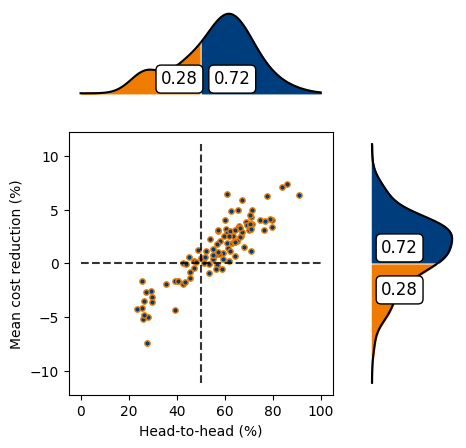

In [11]:
output_dir = DataPath + "output/"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
figure_name = output_dir + "DDR_vs_OLS"
fig_regret_h2h = Regret_H2H()
fig_regret_h2h.Upper_Right(h2h_ddr_ols*100,regret_reduction_ddr_ols*100,figure_name)

##### Lasso vs OLS

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


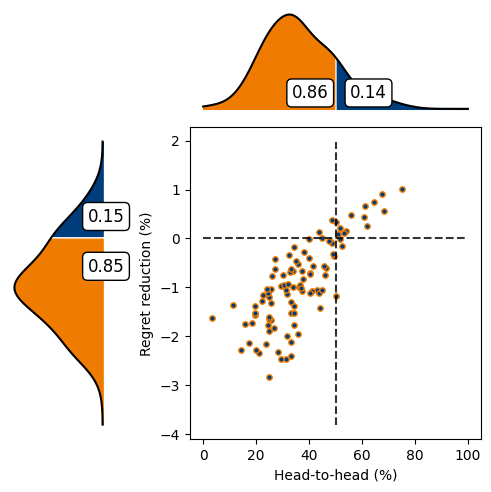

In [12]:
output_dir = DataPath + "output/"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
figure_name = output_dir + "Lasso_vs_OLS"
fig_regret_h2h = Regret_H2H()
fig_regret_h2h.Upper_Left(h2h_lasso_ols*100,regret_reduction_lasso_ols*100,figure_name)

##### Ridge vs OLS

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


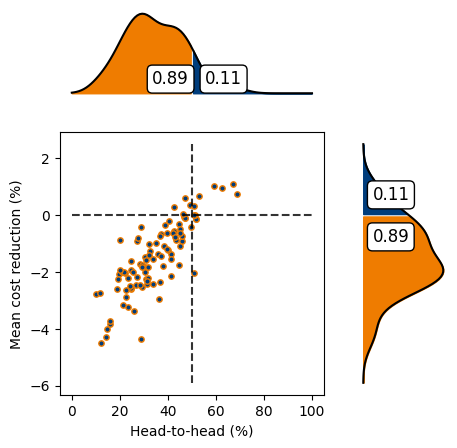

In [14]:
figure_name = output_dir + "Ridge_vs_OLS"
fig_regret_h2h = Regret_H2H()
fig_regret_h2h.Upper_Right(h2h_ridge_ols*100,regret_reduction_ridge_ols*100,figure_name)

##### Lasso vs DDR

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


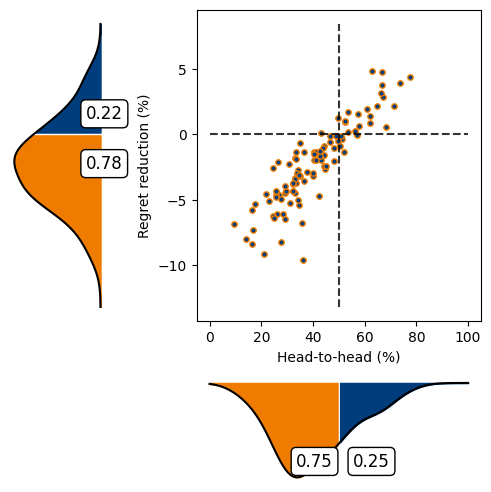

In [15]:
figure_name = output_dir + "Lasso_vs_DDR"
fig_regret_h2h = Regret_H2H()
fig_regret_h2h.Lower_Left(h2h_lasso_ddr*100,regret_reduction_lasso_ddr*100,figure_name)

##### Ridge vs DDR

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


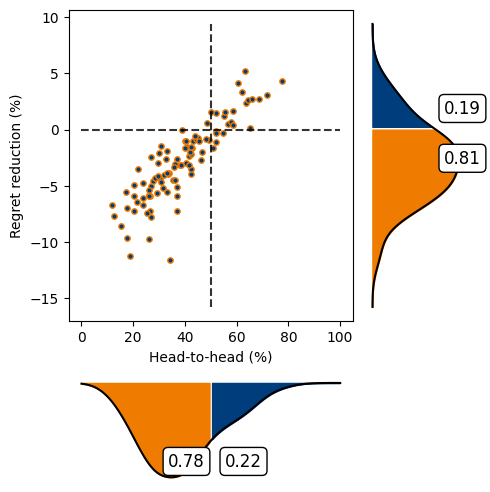

In [16]:
figure_name = output_dir + "Ridge_vs_DDR"
fig_regret_h2h = Regret_H2H()
fig_regret_h2h.Lower_Right(h2h_ridge_ddr*100,regret_reduction_ridge_ddr*100,figure_name)

### Fidelity

In [ ]:
x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[65]

In [ ]:
DDR_Esti = DDR_Method()
mu_all = [-0.25 + i*0.05 for i in range(13)]
lamb_all = [0 + i*0.05 for i in range(81)]

W_ddr_all = {}; w0_ddr_all = {}; 
Pred_accurate_DDR = {}; Pred_accurate_DDR_True = {}
Cost_DDR_wo_noise_all = {}
for mu_index in range(len(mu_all)):
    mu = mu_all[mu_index]
    for lamb_index in range(len(lamb_all)):
        lamb = lamb_all[lamb_index]
        W_ddr_all[i,mu,lamb], w0_ddr_all[i,mu,lamb] = DDR_Esti.DDR_Solver(x_train, z_train, mu, lamb)
        cost_pred_DDR = (W_ddr_all[i,mu,lamb] @ x_test.T).T + w0_ddr_all[i,mu,lamb]

        Cost_DDR_wo_noise_all[mu,lamb] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred_DDR,z_test_ori,z_test-z_test_ori,data_generation_process,False)

        Pred_accurate_DDR[mu,lamb] = ( np.linalg.norm(cost_pred_DDR - z_test) )**2/len(z_test) ## prediction accuracy
        Pred_accurate_DDR_True[mu,lamb] = ( np.linalg.norm(cost_pred_DDR - z_test_ori) )**2/len(z_test_ori) ## prediction accuracy

In [ ]:
Pred_accurate_DDR_True_Avg = {}
Cost_accurate_DDR_True_Avg = {}
for mu in mu_all:
    Cost_accurate_DDR_True_Avg[mu] = [np.mean(Cost_DDR_wo_noise_all[mu,lambnow]) for lambnow in lamb_all]
    # pac[mu] = [mean(pac_ddr_all[mu,lambnow]) for lambnow in lamb_range_cut]
    Pred_accurate_DDR_True_Avg[mu] = [np.mean(Pred_accurate_DDR_True[mu,lambnow]) for lambnow in lamb_all]

In [ ]:
lamb_range_cut = lamb_all

mu = mu_all[8]
print(len(lamb_all))

fig,ax = plt.subplots(figsize=(6,6))
ax.plot(lamb_range_cut, Pred_accurate_DDR_True_Avg[mu], marker=".", label='Mean Squared Error', color='#003D7C')
ax.set_xlabel('$\lambda$', fontsize=15)
ax.set_ylabel('Mean Squared Error', fontsize=15) #, color='#003D7C'
ax.set_ylim(0.50, 1.3)
ax.legend(loc = 2)

ax2=ax.twinx()
ax2.plot(lamb_range_cut, Cost_accurate_DDR_True_Avg[mu], color='#EF7C00', marker="+", label='Mean Cost')
ax2.set_ylabel("Mean Cost",fontsize=15)#, color='#EF7C00'
# ax2.set_ylim(6.0225, 6.037)
ax2.legend(loc = 1)
#     plt.show()

plt.rcParams.update({'font.size': 12})
plt.xlim(-0.1, 4)
fig.savefig(output_dir + 'Prediction_accuracy.eps', format='eps', bbox_inches="tight")
fig.savefig(output_dir + 'Prediction_accuracy.pdf', format='pdf', bbox_inches="tight")

In [ ]:
seed = 3
random.seed(seed)
p = 1
d = 1
samples_test = 100
samples_train = 50
lower = 0
upper = 1
alpha = 1
n_epsilon = 0
mis = 1
thres = 100000
x_dister = 'normal'
e_dister = 'normal'
xl = -2
xu = 4
xm = 2
xv = 0.5
bp = 7
data_generation_process = "DDR_Data_Generation"

data_simu = DataSimulator()
W_star = data_simu.generate_truth(lower, upper, p, d, data_generation_process) # o uniform, 1 sparse, 2 uniform + feature, 3 sparse + feature
data = data_simu.generate_samples(file_path,p, d, samples_test, samples_train, alpha, W_star, n_epsilon, mis, thres, data_generation_process, 
                                        x_dister, e_dister, xl, xu, xm, xv, bp) 
x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = data

In [ ]:
x = x_train.T[0]
y = z_train.T[0]

slope, intercept = np.polyfit(x, y, 1)  # linear model adjustment

y_model = np.polyval([slope, intercept], x)   # modeling...

x_mean = np.mean(x)
y_mean = np.mean(y)
n = x.size                        # number of samples
m = 2                             # number of parameters
dof = n - m                       # degrees of freedom
t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence

residual = y - y_model

std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

# calculating the r2
# https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
# Pearson's correlation coefficient
numerator = np.sum((x - x_mean)*(y - y_mean))
denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
correlation_coef = numerator / denominator
r2 = correlation_coef**2

# mean squared error
MSE = 1/n * np.sum( (y - y_model)**2 )

# to plot the adjusted model
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = np.polyval([slope, intercept], x_line)

# confidence interval
ci = t * std_error * (1/n + (x_line - x_mean)**2 / np.sum((x - x_mean)**2))**.5
# predicting interval
pi = t * std_error * (1 + 1/n + (x_line - x_mean)**2 / np.sum((x - x_mean)**2))**.5  

############### Ploting
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([.1, .1, .8, .8])

ax.plot(x, y, 'o', color = '#003D7C') # royalblue
ax.plot(x_line, y_line, color = '#003D7C')
ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval') #skyblue

ax.set_xlabel('x')
ax.set_ylabel('z')

# rounding and position must be changed for each case and preference
a = str(np.round(intercept))
b = str(np.round(slope,2))
r2s = str(np.round(r2,2))
MSEs = str(np.round(MSE))

# ax.text(3.5, 10.0, 'y = ' + a + ' + ' + b + ' x')
# ax.text(3.5, 9.0, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)

plt.legend(fontsize=12)

x1 = np.array([0.5 + 0.1*i for i in range(25)])
y1 = 1.953*(np.sin(x1-3.14159)) - 0.07127*((x1-9.7)**2) + 15.15
plt.plot(x1,y1, '-.', color = '#EF7C00', alpha = 1, linewidth = 2.0)

y2 = -1.208*(np.sin(x1-3.14159)) - 0.03607*((x1-10)**2) + 9.221
plt.plot(x1,y2, '-.', color = '#EF7C00', alpha = 1, linewidth = 2.0)
fig.savefig(output_dir + 'Prediction_interval.eps', format='eps', bbox_inches="tight")
fig.savefig(output_dir + 'Prediction_interval.pdf', format='pdf', bbox_inches="tight")

### Calibrating $\lambda$ and $\mu$

In [ ]:
x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[65]

In [ ]:
Cost_Oracle_iter = ddr_eva.compute_DDR_out_of_sample_Cost(z_test_ori,z_test_ori,z_test-z_test_ori,data_generation_process,False)

In [ ]:
ORE = OLS_Related_Estimation()
W_ols, w0_ols, t_ols, obj_ols = ORE.OLS_Solver("",x_train, z_train)
cost_pred = (W_ols @ x_test.T).T + w0_ols
Cost_OLS_iter = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,False)

In [ ]:
DDR_Esti = DDR_Method()
mu_all = [-0.25 + i*0.05 for i in range(13)]
lamb_all = [0 + i*0.05 for i in range(81)]

W_ddr_all = {}; w0_ddr_all = {}; 
Pred_accurate_DDR = {}; Pred_accurate_DDR_True = {}
Cost_DDR_iter = {}
for mu_index in range(len(mu_all)):
    mu = mu_all[mu_index]
    for lamb_index in range(len(lamb_all)):
        lamb = lamb_all[lamb_index]
        W_ddr_all[mu,lamb], w0_ddr_all[mu,lamb] = DDR_Esti.DDR_Solver(x_train, z_train, mu, lamb)
        cost_pred_DDR = (W_ddr_all[mu,lamb] @ x_test.T).T + w0_ddr_all[mu,lamb]
        Cost_DDR_iter[mu,lamb] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred_DDR,z_test_ori,z_test-z_test_ori,data_generation_process,False)

In [ ]:
regret_DDR_OLS_all = {}
regret_correct = {}
for mu in mu_all:
    regret_DDR_OLS_all[mu] = [( np.mean(Cost_OLS_iter) - np.mean(Cost_DDR_iter[mu,lambnow]) ) / ( np.mean(Cost_OLS_iter) - np.mean(Cost_Oracle_iter) )*100 for lambnow in lamb_all]

In [ ]:
lamb_range_cut = lamb_all
plt.figure(figsize=(9,6))
for mu in mu_all:
    plt.plot(lamb_range_cut, regret_DDR_OLS_all[mu])
    plt.text(lamb_range_cut[len(lamb_range_cut)-1], regret_DDR_OLS_all[mu][len(lamb_range_cut)-1], '$\mu$='+ str(np.round(mu, decimals = 3)))
    
plt.plot(lamb_range_cut, regret_DDR_OLS_all[mu_all[5]], linewidth=2.5, color = 'black')

plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('Regret reduction (%)', fontsize=15)

plt.rcParams.update({'font.size': 15})

####### Bring the marginals closer to the scatter plot and save eps file
plt.tight_layout(pad = 1)
plt.savefig(output_dir + 'baseline_calibration_regret.eps', format='eps')
plt.savefig(output_dir + 'baseline_calibration_regret.pdf', format='pdf')